<a href="https://colab.research.google.com/github/CasCard/Machine-Learning-Project/blob/master/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [96]:
data=pd.read_csv("ex2data1.csv",header=None)
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [97]:
X=data.iloc[:,:-1]
y=data.iloc[:,2]
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


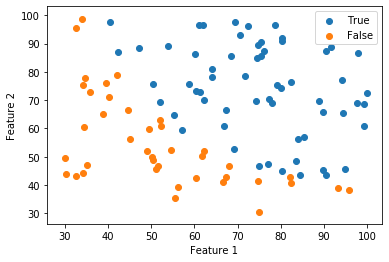

In [98]:
mask=y==1
true=plt.scatter(X[mask][0].values,X[mask][1].values)
false=plt.scatter(X[~mask][0].values,X[~mask][1].values)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend((true,false),('True','False'))
plt.show()

In [0]:

def sigmoid(x):
  return 1/(1+np.exp(-x))


In [100]:
def costFunction(theta,X,y):
  m=len(y)
  predictions=sigmoid(np.dot(X,theta))
  error=(-y*np.log(predictions))-((1-y)*np.log(1-predictions))
  cost=1/m*sum(error)
  grad=1/m*np.dot(X.transpose(),(predictions-y))
  return cost[0],grad



def featureNormalization(X):
  mean=np.mean(X,axis=0)
  std=np.std(X,axis=0)
  X_norm=(X-mean)/std
  return X_norm,mean,std



m,n=X.shape[0],X.shape[1]
X,X_mean,X_std=featureNormalization(X)
X=np.hstack((np.ones((m,1)),X))
y=y[:,np.newaxis]
inital_theta=np.zeros((n+1,1))
cost,grad=costFunction(inital_theta,X,y)
print("Cost of inital theta is",cost)
print("Gradient at initial theta(zeros)",grad)

Cost of inital theta is 0.693147180559946
Gradient at initial theta(zeros) [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


In [0]:
def gradientDescent(X,y,theta,alpha,iterations):
  m=len(y)
  J_history=[]
  for i in range(iterations):
    cost,grad=costFunction(theta,X,y)
    theta=theta-(alpha*grad)
    J_history.append(cost)

  return theta,J_history
    

In [102]:
theta,J_history=gradientDescent(X,y,inital_theta,1,400)
print("Theta optimized by gradient descent:",theta)
print("The cost of the optimized theta:",J_history[-1])

Theta optimized by gradient descent: [[1.65947664]
 [3.8670477 ]
 [3.60347302]]
The cost of the optimized theta: 0.2036004424822667


Text(0.5, 1.0, 'Cost function using Gradient Descent')

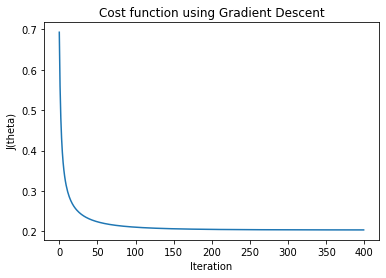

In [103]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("J(theta)")
plt.title("Cost function using Gradient Descent")


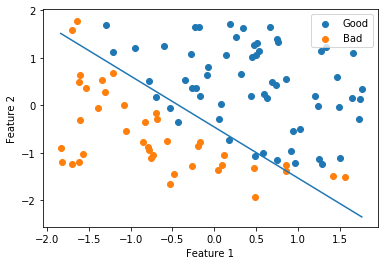

In [105]:
plot_x = np.array([np.min(X[:,1]),np.max(X[:,1])])
plot_y = -(theta[0] +theta[1]*plot_x)/theta[2]
adm = plt.scatter(X[mask][:,1], X[mask][:,2])
not_adm = plt.scatter(X[~mask][:,1], X[~mask][:,2])
decision_boun = plt.plot(plot_x, plot_y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend((adm, not_adm), ('Good', 'Bad'))
plt.show()

In [0]:
def classifierPredict(theta,X):
    predictions = X.dot(theta)
    return predictions>0

In [107]:
p=classifierPredict(theta,X)
print("Train Accuracy:", sum(p==y)[0],"%")

Train Accuracy: 89 %
